In [18]:
from datasets.rsna_breast_cancer import BreastCancerDataset
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
dataset_path = "../datasets/data/img/"  # Pfad zu den Bildern
meta_data_csv_path = "../datasets/data/train.csv"  # Pfad zur Meta-Daten CSV
dataset = BreastCancerDataset(img_dir=dataset_path, meta_data_csv_path=meta_data_csv_path)



In [51]:
def plot_samples(dataset, n=5):
    fig, axs = plt.subplots(1, n, figsize=(20, 4))
    for i in range(n):
        sample = dataset[i]
        axs[i].imshow(sample["image"], cmap="gray")
        axs[i].set_title(f"Anomaly: {sample['is_anomaly']}")
        axs[i].axis("off")
    plt.tight_layout()
    plt.show()


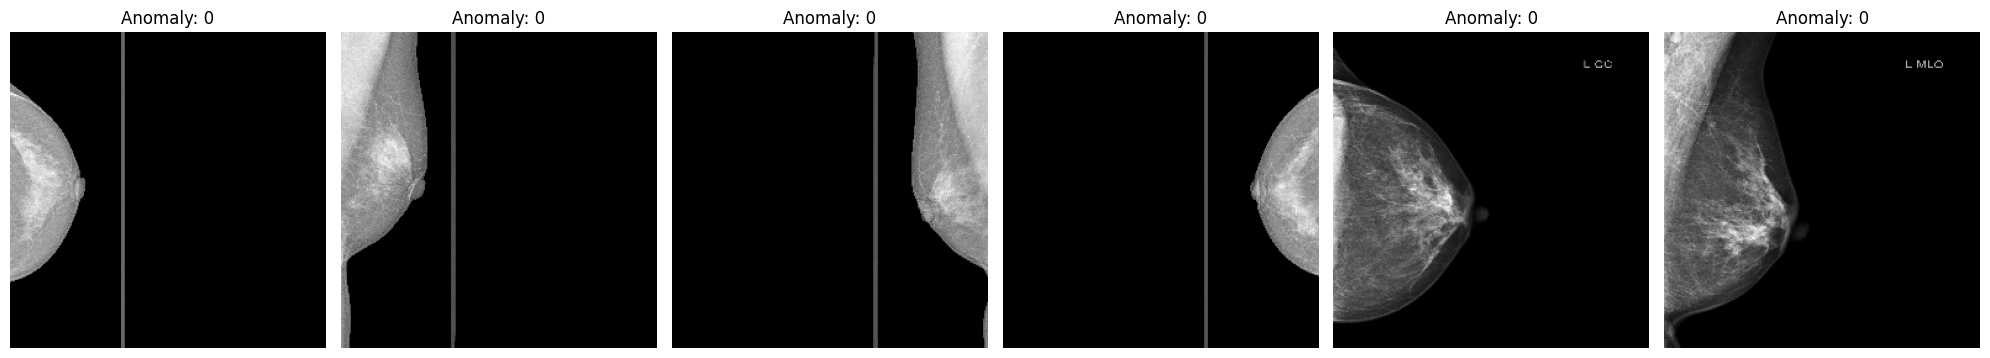

In [52]:
plot_samples(dataset, n=6)